In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

from scipy import stats

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as po

df_dog = pd.read_csv('dog_tick_offers_q2_18.csv')
df_cat = pd.read_csv('cat_tick_offers_q2_18.csv')
df_skin = pd.read_csv('skin_care_offers_q2_18.csv')
df_dog['sold_on'] = pd.to_datetime(df_dog.sold_on,infer_datetime_format=True)
df_cat['sold_on'] = pd.to_datetime(df_cat.sold_on,infer_datetime_format=True)
df_skin['sold_on'] = pd.to_datetime(df_skin.sold_on,infer_datetime_format=True)
df_dog['minus_fvf'] = df_dog.amount - df_dog.fvf
df_cat['minus_fvf'] = df_cat.amount - df_cat.fvf
df_skin['minus_fvf'] = df_skin.amount - df_skin.fvf

df_dog.columns

Index(['id', 'amount', 'sold_on', 'fvf', 'source_em', 'minus_fvf'], dtype='object')

In [112]:
#sources=['GOOGLE_ORGANIC', 'GOOGLE_PRODUCT', 'BING', 'EMAIL', 'DIRECT', 'OTHER_SEARCH_ENGINE', 'SOCIAL', 'OTHER', 
#'GOOGLE_SHOPPING','EBAY' ,'AMAZON','NEXTAG','PRICEGRABBER','THE_FIND','SHOPZILLA','BING_AD','GOOGLE_TEXT_AD',
#'SEARCH_SELLER_TARGETED','SELLER_TARGETED_MEDIA','FRIEND','UNKNOWN','BONANZA_AFFILIATE','AFFILIATE_WINDOW','BONANZA_PROMOTIONS','BURNER_BLOG',
#'EMAIL_SERIES','WEBSTORE','CUSTOMER_MARKETING','FACEBOOK','TWITTER','PINTEREST','INSTAGRAM']

sources= {0.0:'GOOGLE_ORGANIC', 1.0 :'GOOGLE_PRODUCT', 2.0 :'BING', 3.0 :'EMAIL', 4.0 :'DIRECT', 5.0 :'OTHER_SEARCH_ENGINE', 6.0 :'SOCIAL', 7.0:'OTHER', 
8.0: 'GOOGLE_SHOPPING',9.0:'EBAY' ,10.0:'AMAZON',11.0:'NEXTAG',12.0:'PRICEGRABBER',13.0:'THE_FIND',14.0:'SHOPZILLA',15.0:'BING_AD',16.0:'GOOGLE_TEXT_AD',
17.0:'SEARCH_SELLER_TARGETED',18.0:'SELLER_TARGETED_MEDIA',19.0:'FRIEND',20.0:'UNKNOWN',21.0:'BONANZA_AFFILIATE',22.0:'AFFILIATE_WINDOW',23.0:'BONANZA_PROMOTIONS',
24.0:'BURNER_BLOG',25.0:'EMAIL_SERIES',26.0:'WEBSTORE',27.0:'CUSTOMER_MARKETING',28.0:'FACEBOOK',29.0:'TWITTER',30.0:'PINTEREST',31.0:'INSTAGRAM'}

df_dog.source_em.replace(sources, inplace=True)
df_cat.source_em.replace(sources, inplace=True)
df_skin.source_em.replace(sources, inplace=True)
        

In [113]:
print('Total Dog Orders: ' + str(round(df_dog.amount.count())))
print('Total Dog GMV: ' + str(round(df_dog.amount.sum())))
print('Total Dog FVF: ' + str(round(df_dog.fvf.sum())))
print('Average FVF per Order: ' + str(round(df_dog.fvf.mean(),2)))
print(' ')
print('Total Cat Orders: ' + str(round(df_cat.amount.count())))
print('Total Cat GMV: ' + str(round(df_cat.amount.sum())))
print('Total Cat FVF: ' + str(round(df_cat.fvf.sum())))
print('Average FVF per Order: ' + str(round(df_cat.fvf.mean(),2)))
print(' ')
print('Total Skin Care Orders: ' + str(round(df_skin.amount.count())))
print('Total Skin Care GMV: ' + str(round(df_skin.amount.sum())))
print('Total Skin Care FVF: ' + str(round(df_skin.fvf.sum())))
print('Average FVF per Order: ' + str(round(df_skin.fvf.mean(),2)))

Total Dog Orders: 1573
Total Dog GMV: 110709.0
Total Dog FVF: 7739.0
Average FVF per Order: 4.92
 
Total Cat Orders: 2497
Total Cat GMV: 207330.0
Total Cat FVF: 13082.0
Average FVF per Order: 5.24
 
Total Skin Care Orders: 4608
Total Skin Care GMV: 316527.0
Total Skin Care FVF: 20873.0
Average FVF per Order: 4.54


In [82]:
print(
df_dog.groupby(df_dog.source_em).count().sort_values('id', ascending=False)['id'],
df_cat.groupby(df_cat.source_em).count().sort_values('id', ascending=False)['id'],
df_skin.groupby(df_skin.source_em).count().sort_values('id', ascending=False)['id']
)



source_em
GOOGLE_SHOPPING        1222
DIRECT                  125
AFFILIATE_WINDOW         67
EMAIL                    54
GOOGLE_ORGANIC           53
GOOGLE_TEXT_AD           26
OTHER                     6
BING_AD                   5
BING                      4
SOCIAL                    4
OTHER_SEARCH_ENGINE       2
CUSTOMER_MARKETING        1
Name: id, dtype: int64 source_em
GOOGLE_SHOPPING        2232
DIRECT                   87
AFFILIATE_WINDOW         77
EMAIL                    38
GOOGLE_ORGANIC           28
BING                     10
GOOGLE_TEXT_AD            9
OTHER                     4
SOCIAL                    3
OTHER_SEARCH_ENGINE       2
Name: id, dtype: int64 source_em
GOOGLE_SHOPPING        3607
DIRECT                  380
GOOGLE_ORGANIC          255
EMAIL                   119
AFFILIATE_WINDOW        110
GOOGLE_TEXT_AD           31
BING                     17
BING_AD                  12
OTHER                    11
OTHER_SEARCH_ENGINE       8
WEBSTORE                  8


In [114]:
dog_fvf = round(df_dog.fvf.sum())
cat_fvf = round(df_cat.fvf.sum())
skin_fvf = round(df_skin.fvf.sum())
dog_gmv = round(df_dog.minus_fvf.sum())
cat_gmv = round(df_cat.minus_fvf.sum())
skin_gmv = round(df_skin.minus_fvf.sum())
fvfs = [dog_fvf, cat_fvf, skin_fvf]
gmvs = [dog_gmv, cat_gmv, skin_gmv]

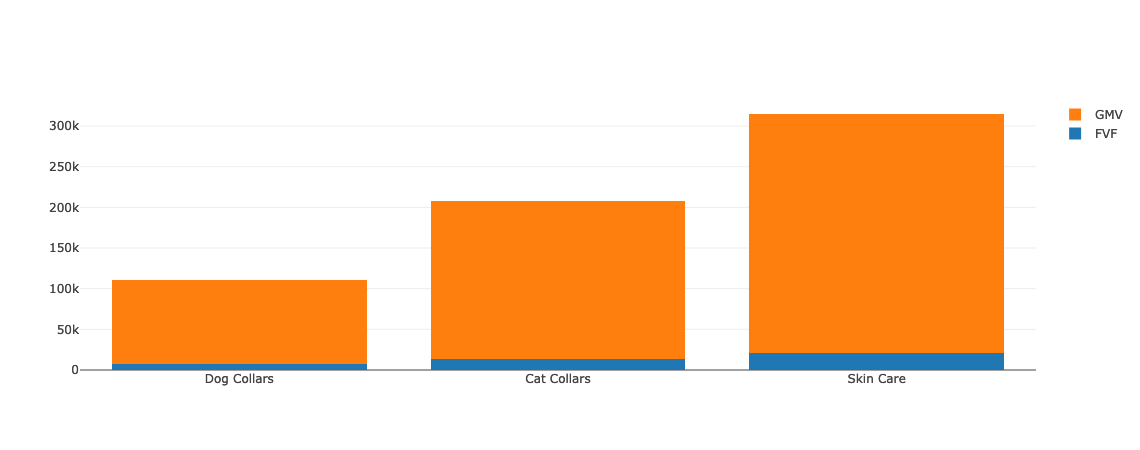

In [115]:
#Create a Stacked Bar Chart where each Bar is the different Dataframe stacked by FVF and GMV

x = ['Dog Collars', 'Cat Collars', 'Skin Care']


trace1 = go.Bar(
    x=x,
    y=fvfs,
    name='FVF'
)
trace2 = go.Bar(
    x=x,
    y=gmvs,
    name='GMV'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
po.iplot(fig, filename='stacked-bar')

In [127]:
df_dog_sum_fvf = df_dog.set_index('sold_on').groupby(pd.Grouper(freq='W')).sum().reset_index()['fvf']
df_cat_sum_fvf = df_cat.set_index('sold_on').groupby(pd.Grouper(freq='W')).sum().reset_index()['fvf']
df_skin_sum_fvf = df_skin.set_index('sold_on').groupby(pd.Grouper(freq='W')).sum().reset_index()['fvf']

In [130]:
days = []
for i in range(1,31, 7):
    days.append('April ' + str(i))
for i in range(1,32, 7):
    days.append('May ' + str(i))
for i in range(1,31, 7):
    days.append('June ' + str(i))

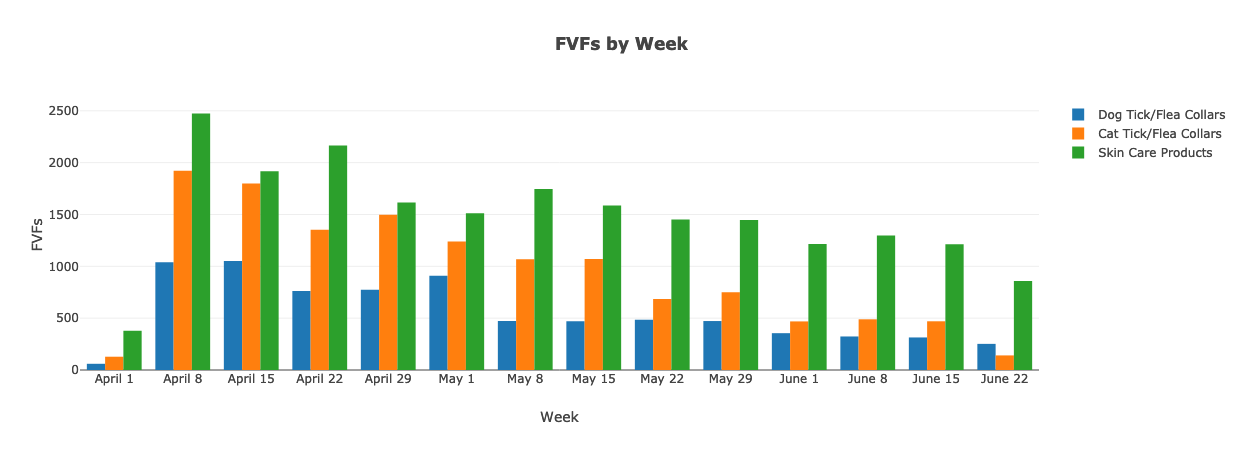

In [132]:
trace0 = go.Bar(
    x = days,
    y = df_dog_sum_fvf,
    name = 'Dog Tick/Flea Collars',
)
trace1 = go.Bar(
    x = days,
    y = df_cat_sum_fvf,
    name = 'Cat Tick/Flea Collars',
)
trace2 = go.Bar(
    x = days,
    y = df_skin_sum_fvf,
    name = 'Skin Care Products',
)
data = [trace0, trace1, trace2]

# Edit the layout
layout = dict(title = '<b>FVFs by Week</b>',
              xaxis = dict(title = 'Week'),
              yaxis = dict(title = 'FVFs'),
              barmode='group'
              )

fig = dict(data=data, layout=layout)
po.iplot(fig, filename='Membership_Sum_Per_Month_Total')